# **Grover**

Notebook para estudar o algoritmo de Grover

O Algoritmo de Grover é composto por 3 partes principais:
- Superposição
- Oráculo
- Difusor

Os passos para a construção do circuito são


**Passo 0**: $|\psi_0\rangle = |0\rangle^{\otimes n}$

Definir todos os qubits como $|0\rangle$, ou seja, $|\psi_0\rangle = |0\rangle^{\otimes n}$, onde $n$ é o número de qubtis do circuito

**Passo 1:** $|\psi_1\rangle \equiv H^{\otimes n}|\psi_0\rangle = H^{\otimes n}|0\rangle^{\otimes n}$

Colocar todos os qubits em superposição




In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

/opt/miniconda3/envs/qiskit/lib/python3.12/site-packages/qiskit/synthesis/unitary/qsd.py:20: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  import scipy


# Algoritmo de Grover com 3 qubits

$n = 3$, onde $n$ é o número de qubits

$N = 8$, onde $N$ é o número de estados ($2^n$)

Lista de estados com 3 qubits: {$|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle, |111\rangle$}

$|w\rangle$ é o estado que será procurado na lista (ex: $|010\rangle$)

$|s\rangle$ representa os estados em superposição: $|s\rangle = \frac{1}{\sqrt{N}} (|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle, |111\rangle)$

$|s'\rangle$ é o conjunto de estados em superposição **sem** o elmento procurado ($|w\rangle$): $|s'\rangle \equiv |s\rangle - \frac{1}{\sqrt{N}}|w\rangle$

Como $\langle s'|s'\rangle = 1$, o estado deve estar normalizado: $|s\rangle = \frac{1}{\sqrt{N-1}} (|000\rangle, |001\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle, |111\rangle)$

Escrever o estado $|s\rangle$ na base {$|s'\rangle$, $|w\rangle$}: $|s\rangle = a|s'\rangle + b|w\rangle$

Considerando que:

- $|a|^2 + |b|^2 = 1$
- $\langle w|w\rangle = 1$
- $\langle s'|s'\rangle = 1$
- $\langle s'|w\rangle = 0$

Com essas propriedades podemos encontrar:

$a \equiv \langle s'|s\rangle = \sqrt{\frac{N-1}{N}}$

$b \equiv \langle w|s\rangle = \frac{1}{\sqrt{N}}$

**O algoritmo de Grover tem como objetivo transformar $|s\rangle$ (o estado com todos os elementos) em $|w\rangle$ (o estado procurado)**

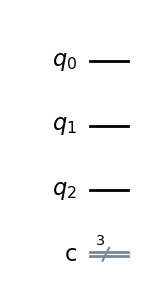

In [2]:

qc = QuantumCircuit(3,3)
qc.draw('mpl')


In [3]:
Statevector.from_instruction(qc).draw('latex')

<IPython.core.display.Latex object>

# Superposição

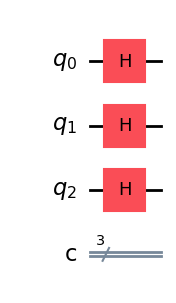

In [4]:
qc.h(0)
qc.h(1)
qc.h(2)

qc.draw('mpl')

In [ ]:
Statevector.from_instruction(qc).draw('latex')

<IPython.core.display.Latex object>

**Observação**

$\frac{\sqrt{2}}{4}$ é a mesma coisa que $\frac{1}{\sqrt{8}}$

# Oráculo

Seu principal objetivo é "marcar" o estado que será procurado. Matematicamente o que ele faz é colocar um sinal *negativo* na fase do estado marcado.